In [1]:
import numpy as np
import matplotlib.pyplot as plt

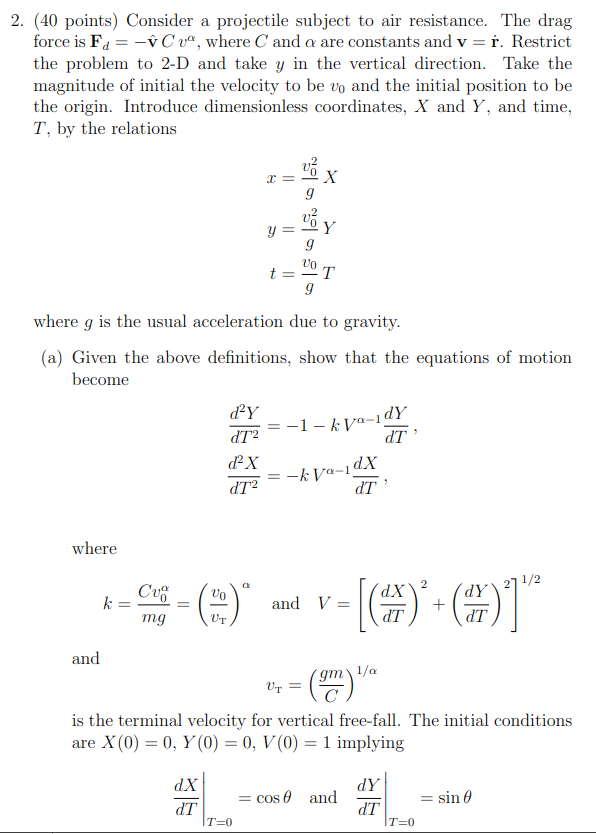
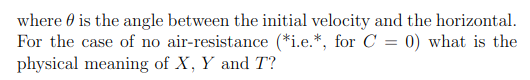

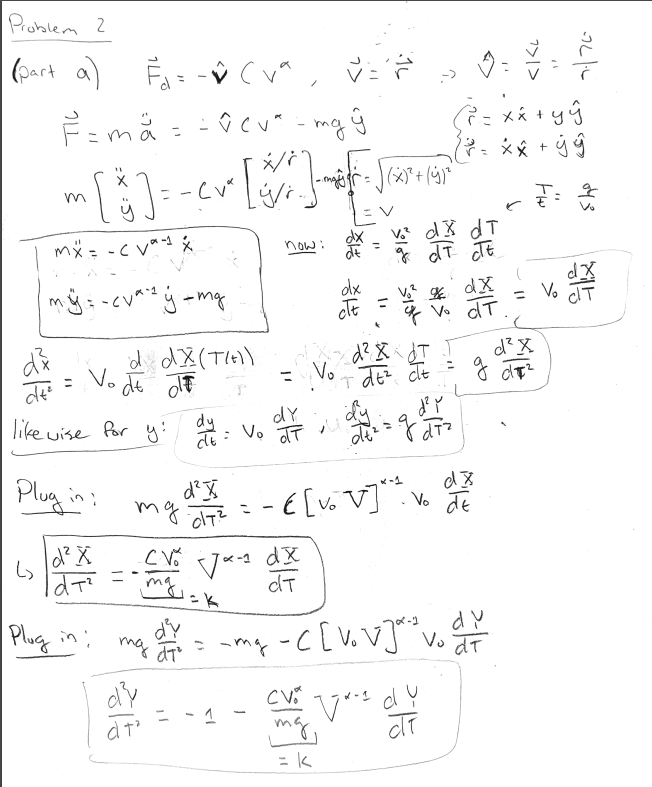
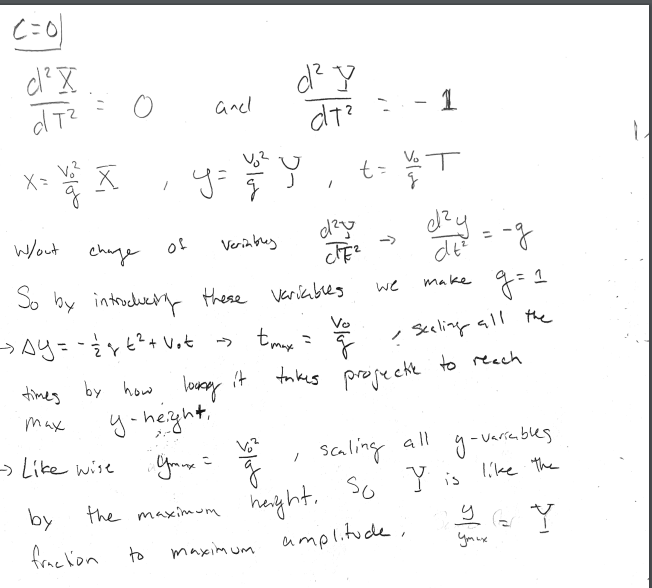
Not like, is the fraction to max amplitude and same goes for the time!

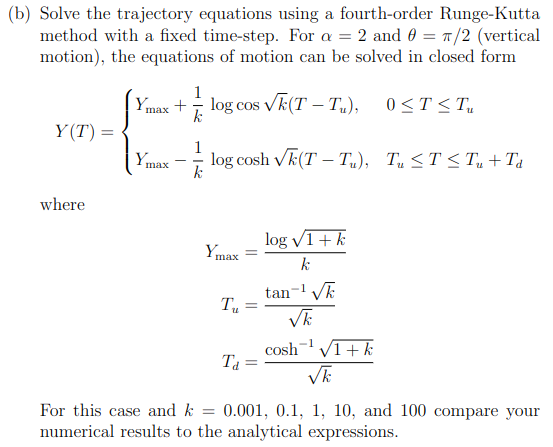
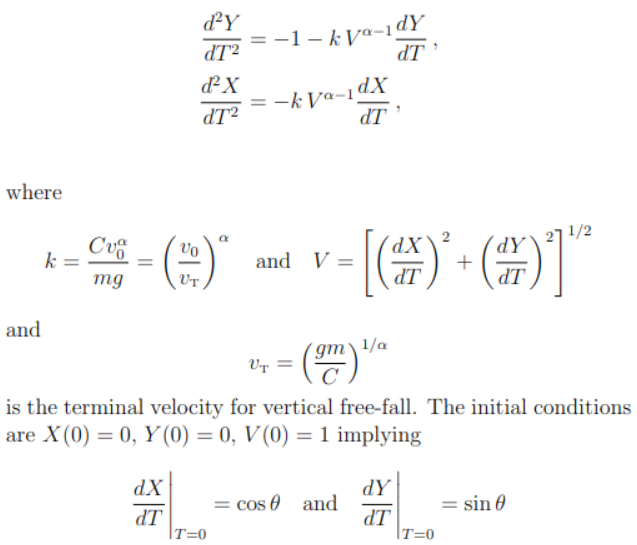

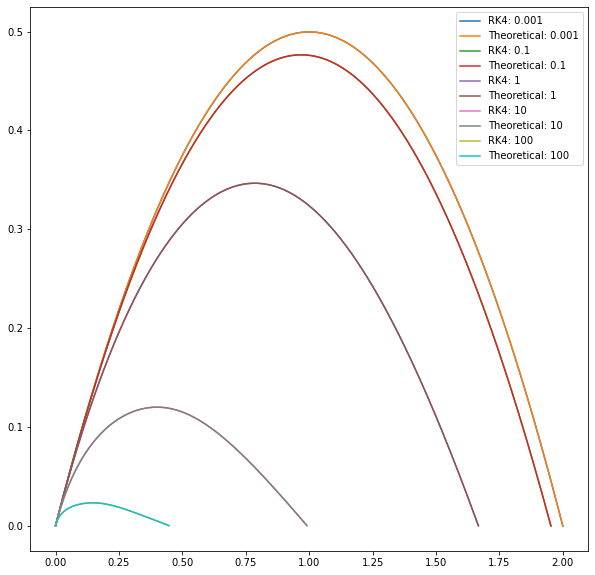

In [6]:
def calc_Y(k):
    
    def RK4(step,tbounds,y0,diffeq):
        t0, tf = tbounds[0], tbounds[1]
        def yn_1(tn,yn):
            k1 = step*diffeq(tn,yn)
            k2 = step*diffeq(tn + 0.5*step, yn + 0.5*k1)
            k3 = step*diffeq(tn + 0.5*step, yn + 0.5*k2)
            k4 = step*diffeq(tn + step, yn + k3)
            return yn + (k1/6+k2/3+k3/3+k4/6)

        ts = np.arange(t0,tf+step,step)
        yn=y0
        ys = []
        for t in ts:
            ys.append(yn)
            yn1 = yn_1(t,yn)
            yn = yn1
        return ts,ys

    #vertical motion only don't consider the x-direction, it is 0!
    def VY(t,VY):
        #VY_dot = -1 - k * abs(VY)**(alpha-1) * VY
        return -1 - k*(np.absolute(VY)**(2-1))*VY 
    
    def Y_theory(T):
        tu = np.arctan(np.sqrt(k))/np.sqrt(k)
        td = np.arccosh(np.sqrt(1+k))/np.sqrt(k)
        Ymax = np.log(np.sqrt(1+k))/k
        T_split = T[T<=tu]
        T_split2 = T[T>tu]
        Y_left = Ymax + np.log(np.cos(np.sqrt(k)*(T_split-tu)))/k #took derivative of analytical solution
        Y_right = Ymax - np.log(np.cosh(np.sqrt(k)*(T_split2-tu)))/k
        return np.concatenate((Y_left,Y_right),axis=None)
    
    Tu = np.arctan(np.sqrt(k))/np.sqrt(k)
    Td = np.arccosh(np.sqrt(1+k))/np.sqrt(k)

    step_size = 0.001
    tbounds = (0,Tu+Td) #t0, tf
    VY0 = 1             #why is this 1...? means it starts at max velocity i think
    Ts, VYs = RK4(step_size,tbounds,VY0,VY)
        
    distance_traveled = 0
    ds = [0]

    for i in range(len(VYs)-1): #compute the area under VY curve = distance traveled in one time step
        distance_traveled += (Ts[i+1]-Ts[i])/(2) * (VYs[i+1]+VYs[i]) #area of trapezoid
        ds.append(distance_traveled)

    return Ts, ds, Y_theory(Ts)

plt.figure(figsize=(10,10))

for k in [0.001,0.1,1,10,100]:
    tk, dsk, Ytheoryk = calc_Y(k)
    plt.plot(tk,dsk,label=f'RK4: {k}')
    plt.plot(tk,Ytheoryk,label=f'Theoretical: {k}')
plt.legend()


In [ ]:
#part C

In [ ]:
#legacy code

#     def VY_theory(T): #theoretical velocity curve
#         tu = np.arctan(np.sqrt(k))/np.sqrt(k)
#         td = np.arccosh(np.sqrt(1+k))/np.sqrt(k)
#         T_split = T[T<=tu]
#         T_split2 = T[T>tu]
#         VY_left = -np.tan(np.sqrt(k)*(T_split-tu))/(np.sqrt(k)) #took derivative of analytical solution
#         VY_right = -np.tanh(np.sqrt(k)*(T_split2-tu))/(np.sqrt(k))
#         return np.concatenate((VY_left,VY_right),axis=None)

#     fig, axs = plt.subplots(1,2,figsize = (20,10))
    
#     axs[0].plot(Ts,VYs,label='RK4')
#     axs[0].plot(Ts,VY_theory(Ts),label='Theory')
#     axs[0].legend()
#     axs[0].set_title('Velocity of RK4 and Theory')
#     axs[0].set_xlabel('T')
#     axs[0].set_ylabel('VY')
    
    #now compute the area under the velocity curve
    #Area can be calculated perfectly since it is discrete
    #Thus we can calculate: 
    #distance traveled in one time step = VYn * deltaT + deltaT * (VY_n+1 - VY_n)

    
#     axs[1].plot(Ts,ds,label='RK4')
#     axs[1].plot(Ts,Y_theory(Ts),label='Theory')
#     axs[1].legend()
#     axs[1].set_title('Distance of RK4 and Theory')
#     axs[1].set_xlabel('T')
#     axs[1].set_ylabel('Y')